In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Importing libraries
import pandas as pd
import os
import pickle

from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from src.models import parameter_learning as lfi
from src.models import build_model as build
from src.models import model_schemata as schema
from src.models import inference as inf
from src.visualization import visualize as viz

In [3]:
os.chdir('/Users/magdalena/OneDrive - Queen Mary, University of London/bezzlab/research/projects/phospho_pi/')
# os.chdir('/home/mhuebner/Desktop/bezzlab/research/projects/phospho_pi/')

In [4]:
experiments = ['exp1_100i', 'exp2_100i']

In [19]:
data = {}
for exp in experiments:
    with open(f'models/ebdt_data/sub_network/e_model/testing_{exp}.pkl', 'rb') as f:
        data[exp] = pickle.load(f)

#### Evaluation of learned parameters

Average JSD per experiment pair

In [20]:
predicates = ['e_activity']

jsd_dict = {}

# Iterate over predicates
for pred in predicates:
    jsd_dict[pred] = lfi.compare_jsds(pred, experiments, data)

Average fraction of MaxMatch per experiment pair

In [21]:
predicates = ['e_activity']

max_dict = {}

# Iterate over predicates
for pred in predicates:
    max_dict[pred] = lfi.compare_max_categories(pred, experiments, data)

#### Compare AUC (all experiments)

In [22]:
experiments = ['exp1_100i', 'exp2_100i']

In [23]:
data = {}
for exp in experiments:
    with open(f'models/ebdt_data/sub_network/e_model/testing_{exp}.pkl', 'rb') as f:
        data[exp] = pickle.load(f)

In [24]:
e_ksea = pd.read_csv('data/processed/ebdt_data/sub_network_e/e_ksea.csv')

In [25]:
e_ksea['p_base'] = 1 - e_ksea['p_dec'] - e_ksea['p_inc']
e_ksea.loc[e_ksea['p_base'] < 0, 'p_base'] = 0

In [29]:
import random
# getting sample names (union of all samples in all datasets)
samples = list(set(e_ksea['sample']))
samples.sort()
# sample x% of samples randomly without replacement with seed
random.seed(612)
train = random.sample(samples, int(len(samples)*0.8))
test = [x for x in samples if x not in train]
# filter data
e_ksea = e_ksea[e_ksea['sample'].isin(test)]

In [30]:
analysis_dicts_0 = inf.prep_experiments_for_auc(data, e_ksea, result_type='e_activity', y_true_type='e_ksea', threshold=0)
analysis_dicts_80 = inf.prep_experiments_for_auc(data, e_ksea, result_type='e_activity', y_true_type='e_ksea', threshold=0.8)

In [31]:
y_onehot_test_list_0 = []
y_score_list_0 = []
experiment_names = []
for exp in analysis_dicts_0.keys():
    y_onehot_test_list_0.append(analysis_dicts_0[exp]['y_onehot_test'])
    y_score_list_0.append(analysis_dicts_0[exp]['y_score'])
    experiment_names.append(exp)

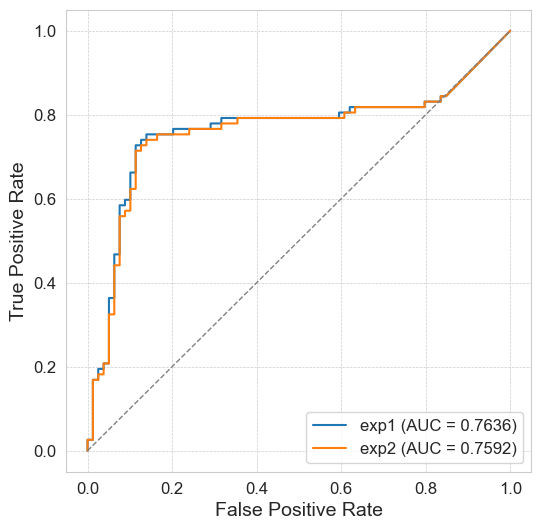

In [32]:
viz.plot_micro_average_roc_seaborn(y_onehot_test_list_0, y_score_list_0, experiment_names)

In [33]:
y_onehot_test_list_80 = []
y_score_list_80 = []
experiment_names = []
for exp in analysis_dicts_80.keys():
    y_onehot_test_list_80.append(analysis_dicts_80[exp]['y_onehot_test'])
    y_score_list_80.append(analysis_dicts_80[exp]['y_score'])
    experiment_names.append(exp)

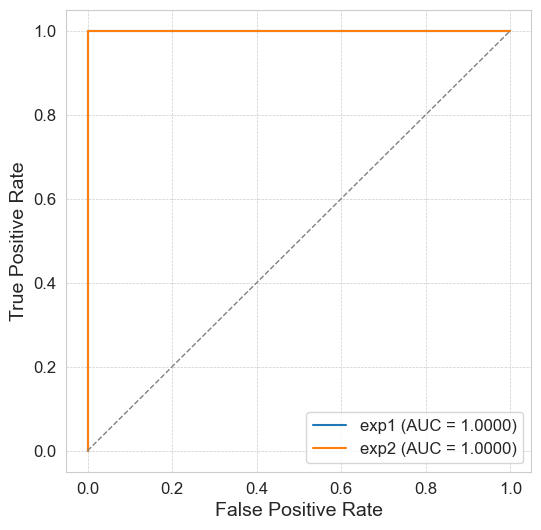

In [34]:
viz.plot_micro_average_roc_seaborn(y_onehot_test_list_80, y_score_list_80, experiment_names)

In [35]:
y_onehot_test_list = []
y_score_list = []
experiment_names = []
for exp in analysis_dicts_0.keys():
    y_onehot_test_list.append(analysis_dicts_0[exp]['y_onehot_test'])
    y_score_list.append(analysis_dicts_0[exp]['y_score'])
    experiment_names.append(exp)
for exp in analysis_dicts_80.keys():
    y_onehot_test_list.append(analysis_dicts_80[exp]['y_onehot_test'])
    y_score_list.append(analysis_dicts_80[exp]['y_score'])
    experiment_names.append(f'{exp}_p>0.8')

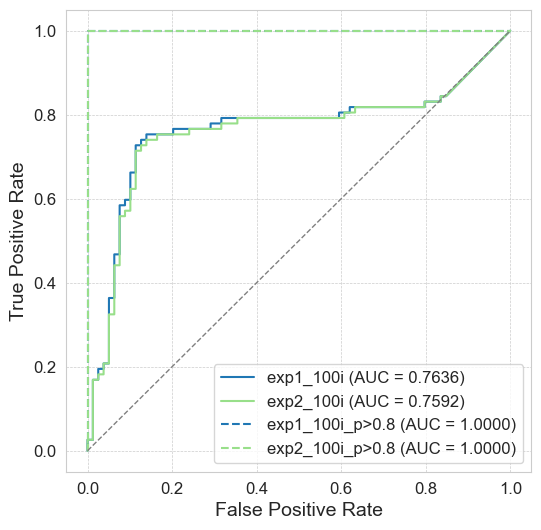

In [36]:
viz.plot_micro_average_roc_seaborn_paired(y_onehot_test_list, y_score_list, experiment_names)

In [37]:
# Extracting data from your analysis dictionary
x1 = analysis_dicts_0['exp1_100i']['analysis_dataframe']['prob']
y1 = analysis_dicts_0['exp1_100i']['analysis_dataframe']['JSD']
mask_no_match1 = analysis_dicts_0['exp1_100i']['analysis_dataframe']['MaxMatch'] == 0

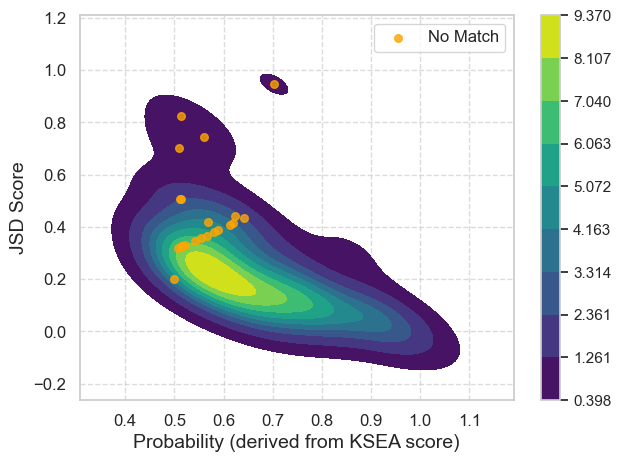

In [38]:
sns.set(style="whitegrid")  # Start with a white grid style

plt.figure(figsize=(7, 5), dpi=100)

# Create the kdeplot
sns.kdeplot(x=x1, y=y1, cmap='viridis', fill=True, levels=10, cbar=True)

# Scatter plot for 'MaxMatch' == 0 (Non Matches)
plt.scatter(x1[mask_no_match1], y1[mask_no_match1], c='orange', s=30, alpha=0.8, label='No Match')

# Scatter plot for 'tc' < 5
# plt.scatter(x[mask_tc_lt_5], y[mask_tc_lt_5], c='blue', s=20, alpha=0.8, marker='x', label='tc < 5')

# Increase the legibility of the ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adding labels, title, and legend
plt.xlabel('Probability (derived from KSEA score)', fontsize=14)
plt.ylabel('JSD Score', fontsize=14)
plt.legend(loc='upper right', fontsize=12)

# Enhance readability
plt.grid(True, linestyle='--', alpha=0.7)
# plt.tight_layout()  # Adjusts the plot to ensure everything fits well

# Display the plot
plt.show()

In [39]:
# Extracting data from your analysis dictionary
x2 = analysis_dicts_0['exp2_100i']['analysis_dataframe']['prob']
y2 = analysis_dicts_0['exp2_100i']['analysis_dataframe']['JSD']
mask_no_match2 = analysis_dicts_0['exp2_100i']['analysis_dataframe']['MaxMatch'] == 0

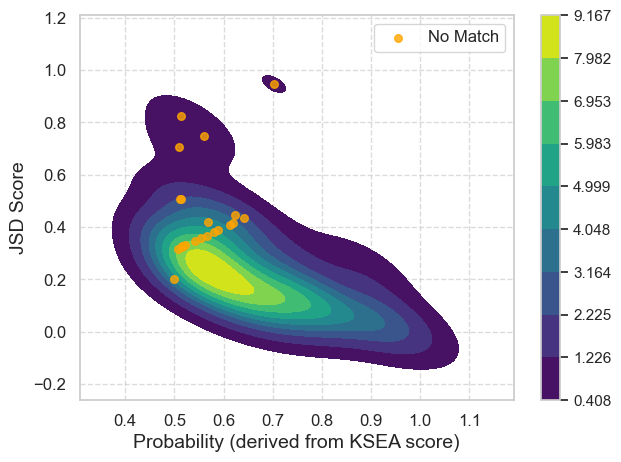

In [40]:
sns.set(style="whitegrid")  # Start with a white grid style

plt.figure(figsize=(7, 5), dpi=100)

# Create the kdeplot
sns.kdeplot(x=x2, y=y2, cmap='viridis', fill=True, levels=10, cbar=True)

# Scatter plot for 'MaxMatch' == 0 (Non Matches)
plt.scatter(x2[mask_no_match2], y2[mask_no_match2], c='orange', s=30, alpha=0.8, label='No Match')

# Scatter plot for 'tc' < 5
# plt.scatter(x[mask_tc_lt_5], y[mask_tc_lt_5], c='blue', s=20, alpha=0.8, marker='x', label='tc < 5')

# Increase the legibility of the ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adding labels, title, and legend
plt.xlabel('Probability (derived from KSEA score)', fontsize=14)
plt.ylabel('JSD Score', fontsize=14)
plt.legend(loc='upper right', fontsize=12)

# Enhance readability
plt.grid(True, linestyle='--', alpha=0.7)
# plt.tight_layout()  # Adjusts the plot to ensure everything fits well

# Display the plot
plt.show()

In [41]:
mismatch_df = analysis_dicts_0['exp2_100i']['analysis_dataframe'][mask_no_match2]

In [42]:
table2 = mismatch_df[mismatch_df['max_category_e_ksea'] == 'p_inc'].sort_values(by=['prob'], ascending=[False])
table2 = table2[['enzyme', 'sample', 'tc', 'max_category_e_ksea', 'prob', 'max_category_e_activity', 'JSD']]
table2

,enzyme,sample,tc,max_category_e_ksea,prob,max_category_e_activity,JSD
6,ABL1,PD153035,10.0,p_inc,0.623607,p_dec,0.444056
9,FYN,GSK690693,2.0,p_inc,0.618515,p_base,0.413701
10,FYN,PF4708671,2.0,p_inc,0.613395,p_base,0.408960
11,FYN,MK2206,2.0,p_inc,0.588752,p_base,0.386621
12,FYN,KD025,2.0,p_inc,0.580960,p_base,0.379719
13,FYN,Tofacitinib,2.0,p_inc,0.566135,p_base,0.366788
2,ABL1,GSK690693,10.0,p_inc,0.560812,p_dec,0.746835
14,FYN,AZD6738,2.0,p_inc,0.553638,p_base,0.356088
15,FYN,Vemurafenib,2.0,p_inc,0.541667,p_base,0.346002
17,FYN,PIK294,2.0,p_inc,0.521772,p_base,0.329579
